# 0-1.Import library

In [1]:
import os
import os.path
import pandas as pd
import pickle

# 0-2.Import Modules

In [2]:
import localPNC as lp
import DEseq2Tools as dt
import StatAnalysis as sa
import PlotTools as pt

# 0-0. Load PNC Dataset

1. Load information for DiffExo pipeline (raw_PNC_XXX.csv) 

In [9]:
test_name = "ChIP-mini_HNS"
raw_df_dir = "/home/joonyoung/share/ChIP-exo_optimization/RPPM/0.GitHub/raw_csv_files/raw_PNC_HNS.csv"
raw_df = lp.load_csv(raw_df_dir)

# 0-1. Make Output Directory

1. Make result folders in output directory. 
2. Modifiy output directory in raw_df csv file.  
3. Execute this code only once when the DiffExo pipeline starts.

In [10]:
os.chdir(raw_df.output[0])
os.mkdir(test_name)
os.chdir(raw_df.output[0] + "/" + test_name)
os.mkdir("plots")
os.mkdir("DEseq2")
output_dir = str(os.getcwd()) + "/"
raw_df["output"] = output_dir
raw_df.to_csv(raw_df_dir)

# 1. Calculate RPPM

### start_PNC(raw_df, test_name) ###
**1. test_name** = test name for RPPM calculation  
**2. raw_df** = raw CSV file of NPC  
1) rppm_df = RPPM values of ChIP-mini or ChIP-exo samlpes inculding dulicates  =>  converted to pickle and CSV files in the output dir  
2) rppm_mean_df = RPPM mean values of samlpes =>  converted to pickle and CSV files in the output dir  

In [13]:
rppm_df, rppm_mean_df = lp.start_PNC(raw_df, test_name)

Sample ID: Invitro RPPM calculation is done!
Sample ID: Invivo RPPM calculation is done!


# 2. Statistical Analysis

### stat_test(raw_df, rppm_mean_df, test)  ###
**1. raw_df** = Raw CSV file of NPC  
**2. rppm_mean_df** = RPPM mean dataframe or RPPM mean pickle file  
**3. test** = Type of statistical test (parametric, nonparametric, default = "auto"), parmetric => analyze overlapping binding sites  
**4. replicates** = statistical anlaysis for replicates (default = False, Use XXX_rppm.pickle)  

# 2.1 Statistical Analysis for Replicates

In [14]:
rppm_pickle_dir = "/home/joonyoung/share/ChIP-exo_optimization/RPPM/0.GitHub/output/ChIP-mini_HNS/ChIP-mini_HNS_rppm.pickle"

In [15]:
#Total RPPM including genome and plasmid
sa.stat_test(raw_df, rppm_pickle_dir, test = "auto", replicates = True)

Leven's test p-value of Invitro replicates = 0.9605733741174836
T-test p-value of Invitro replicates = 0.9387933302893203
Leven's test p-value of Invivo replicates = 0.9142735333501767
T-test p-value of Invivo replicates = 0.9895946367642672


In [16]:
# RPPM of genome
genome_vitro = rppm_df.loc[(rppm_mean_df.Invitro_genome_id == "NC_016856.1"), 
                                ["Invitro_genome_id", "Invitro_start", "Invitro_end", "Invitro_1", "Invitro_2"]]
genome_vivo = rppm_df.loc[(rppm_mean_df.Invivo_genome_id == "NC_016856.1"), 
                               ["Invivo_genome_id", "Invivo_start", "Invivo_end", "Invivo_1", "Invivo_2"]]
genome = pd.concat([genome_vitro.reset_index(drop = True), genome_vivo.reset_index(drop = True)], axis = 1)

sa.stat_test(raw_df, genome, test = "auto", replicates = True)

Leven's test p-value of Invitro replicates = 0.9622211823558275
T-test p-value of Invitro replicates = 0.9353855033378895
Leven's test p-value of Invivo replicates = 0.8898123589243354
T-test p-value of Invivo replicates = 0.9837177051942779


In [17]:
plasmid_vitro = rppm_df.loc[(rppm_mean_df.Invitro_genome_id == "NC_016855.1"), 
                                 ["Invitro_genome_id", "Invitro_start", "Invitro_end", "Invitro_1", "Invitro_2"]]
plasmid_vivo = rppm_df.loc[(rppm_mean_df.Invivo_genome_id == "NC_016855.1"), 
                                ["Invivo_genome_id", "Invivo_start", "Invivo_end", "Invivo_1", "Invivo_2"]]
plasmid = pd.concat([plasmid_vitro.reset_index(drop = True), plasmid_vivo.reset_index(drop = True)], axis = 1)

sa.stat_test(raw_df, plasmid, test = "auto", replicates = True)

Shapiro-wilk test p-value of Invitro_1 replicates = 0.34109777212142944
Shapiro-wilk test p-value of Invitro_2 replicates = 0.3551477789878845
Leven's test p-value of Invitro replicates = 0.9634812198558433
T-test p-value of Invitro replicates = 0.9940316331175959
Shapiro-wilk test p-value of Invivo_1 replicates = 0.6924270987510681
Shapiro-wilk test p-value of Invivo_2 replicates = 0.7507525682449341
Leven's test p-value of Invivo replicates = 0.8808121185531406
T-test p-value of Invivo replicates = 0.9929867043813583


# 2.2 Statistical Analysis between Control and Experiment

In [18]:
sa.stat_test(raw_df, rppm_mean_df, test = "auto", replicates = False)

Invitro and Invivo Leven's test p-value = 0.022988429856619363
Change T-test to Welch's T-test
Invitro and Invivo T-test p-value = 0.5197440576972358


In [19]:
genome_vitro = rppm_mean_df.loc[(rppm_mean_df.Invitro_genome_id == "NC_016856.1"), 
                                ["Invitro_genome_id", "Invitro_start", "Invitro_end", "Invitro"]]
genome_vivo = rppm_mean_df.loc[(rppm_mean_df.Invivo_genome_id == "NC_016856.1"), 
                               ["Invivo_genome_id", "Invivo_start", "Invivo_end", "Invivo"]]

genome_mean = pd.concat([genome_vitro.reset_index(drop = True), genome_vivo.reset_index(drop = True)], axis = 1)

sa.stat_test(raw_df, genome_mean, test = "auto", replicates = False)

Invitro and Invivo Leven's test p-value = 0.0004668365483721273
Change T-test to Welch's T-test
Invitro and Invivo T-test p-value = 0.9272095992017314


In [20]:
plasmid_vitro = rppm_mean_df.loc[(rppm_mean_df.Invitro_genome_id == "NC_016855.1"), 
                                ["Invitro_genome_id", "Invitro_start", "Invitro_end", "Invitro"]]
plasmid_vivo = rppm_mean_df.loc[(rppm_mean_df.Invivo_genome_id == "NC_016855.1"), 
                                ["Invivo_genome_id", "Invivo_start", "Invivo_end", "Invivo"]]
plasmid_mean = pd.concat([plasmid_vitro.reset_index(drop = True), plasmid_vivo.reset_index(drop = True)], axis = 1)

sa.stat_test(raw_df, plasmid_mean, test = "auto", replicates = False)

Invitro and Invivo Leven's test p-value = 0.577008312998291
Invitro and Invivo T-test p-value = 0.10890731605385026


# 3. Make DEseq2 reference peak file

### make_DBPref(raw_df, rppm_df) ###

1. **raw_df** = raw CSV file of NPC
2. **rppm_df** = RPPM values of ChIP-mini or ChIP-exo samlpes inculding dulicates => converted to pickle and CSV files in the output dir  
=> Make overlapping peaks file in the output directory  
      1) test_DEseq2_common_peaks_ref.gff  
      2) test_peak_rppm.pickle files  

In [21]:
rppm_pickle = raw_df.output[0] + "ChIP-mini_HNS_rppm.pickle"
dt.make_DBPref(raw_df, rppm_pickle)

Making reference peak file for DESeq2 is done :)


## ----------------------------------------------------------------------------------------------------------------- ##
                                                       ** Use DEseq2_cal script (R kernel) for DEseq2 after this code **

# 4. Merge DEseq2 result files with RPPM files

### convert_DEseq2(peak_pickle, deg_dir, deg_result) ###

1. **peak_pickle** = RPPM value
2. **deg_dir** = RPPM values of ChIP-mini or ChIP-exo samlpes inculding dulicates => converted to pickle and CSV files in the output dir  
3. **deg_result** = result file of DESeq2 generated by R script

In [22]:
output_dir = raw_df.output[0]
peak_pickle = output_dir + "Invivo_peak_rppm.pickle"
deg_dir =  output_dir + "/DEseq2/Invitro_Invivo_HNS_deg.csv"
deg_result = output_dir + "/DEseq2/Final_Invitro_Invivo_HNS_deg.csv"

dt.convert_DEseq2(peak_pickle, deg_dir, deg_result)

DEseq2 convertion is done :)


In [23]:
total_dir =  output_dir + "/DEseq2/Invitro_Invivo_HNS_total.csv"
total_result = output_dir + "/DEseq2/Final_Invitro_Invivo_HNS_total.csv"

dt.convert_DEseq2(peak_pickle, total_dir, total_result)

DEseq2 convertion is done :)


# 5. Make Peak intensity Plots

### make_boxplot(raw_df, rppm_mean_dir, result_name, log_scale, y_range, show_fliers)  ###
**1. raw_df** = Raw CSV file of NPC  
**2. rppm_mean_df** = RPPM mean dataframe or RPPM mean pickle file   
**3. result_name** = Name of boxplot figure  
**3. log_scale** = log10, log2, ln  (default = "log10")  
**4. y_range** = Range of y axis, ex)) (0,100) (default = None)  
**5. show_fliers** = True of False

In [24]:
rppm_mean_pickle = "/home/joonyoung/share/ChIP-exo_optimization/RPPM/0.GitHub/output/ChIP-mini_HNS/ChIP-mini_HNS_mean_rppm.pickle"

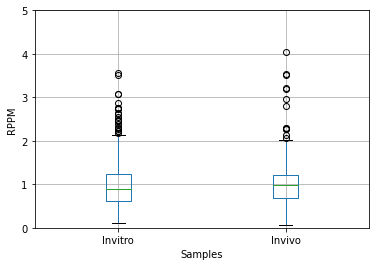

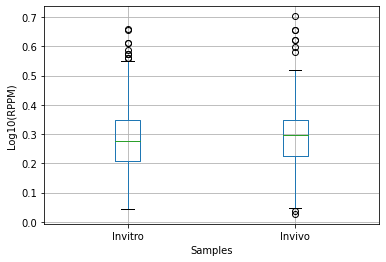

Making a Boxplot (Log10) is done :)


In [26]:
boxplot_dir = test_name
pt.make_boxplot(raw_df, rppm_mean_pickle, boxplot_dir, log_scale = "log10", y_range = (0,5), show_fliers= True)

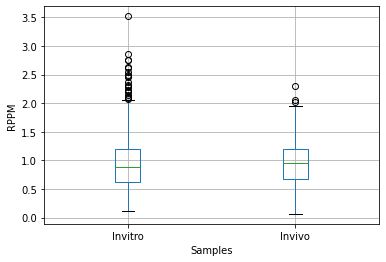

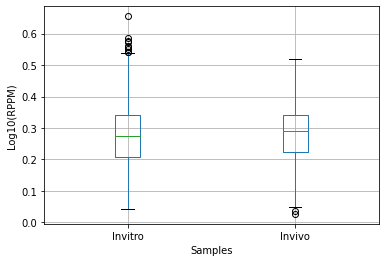

Making a Boxplot (Log10) is done :)


In [27]:
g_boxplot_dir = test_name + "_genome"
pt.make_boxplot(raw_df, genome_mean, g_boxplot_dir, log_scale = "log10", show_fliers= True)

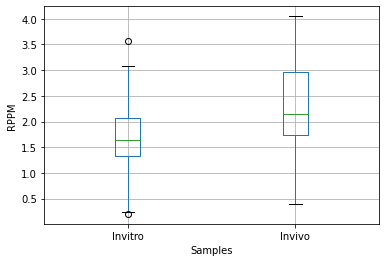

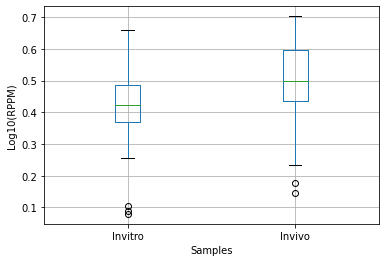

Making a Boxplot (Log10) is done :)


In [29]:
p_boxplot_dir = test_name + "_plasmid"
pt.make_boxplot(raw_df, plasmid_mean, p_boxplot_dir, log_scale = "log10", show_fliers= True)

### make_scatterplot(raw_df, rppm_mean_dir, replicates = False, stat = "pearson")  ###
**1. raw_df** = Raw CSV file of NPC  
**2. rppm_mean_dir** = RPPM dataframe or XXX_rppm.picke for replicates, XXX_mean_peak.pickle file for comparision of control and samples.  
**3. replicates** = type of scatter plot (default = False)  
**4. stat** = pearson or spearman (default = "pearson")  

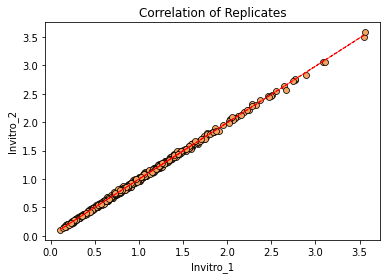

pearson p-value  (0.9993921037844481, 0.0)


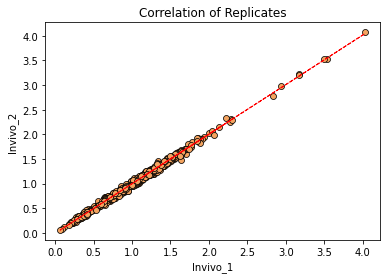

pearson p-value  (0.9974772531144206, 0.0)


In [30]:
rppm_dir =  "/home/joonyoung/share/ChIP-exo_optimization/RPPM/0.GitHub/output/ChIP-mini_HNS/ChIP-mini_HNS_rppm.pickle"
pt.make_scatterplot(raw_df, rppm_dir, replicates = True)

The number of common is 642


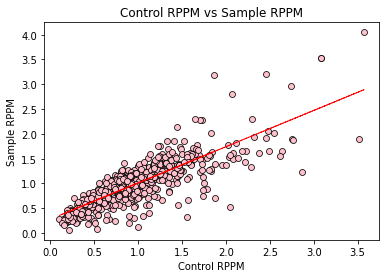

pearson p-value  (0.8177409104948521, 1.1389565753973267e-155)


In [31]:
rppm_mean_dir =  "/home/joonyoung/share/ChIP-exo_optimization/RPPM/0.GitHub/output/ChIP-mini_HNS/ChIP-mini_HNS_mean_rppm.pickle"
pt.make_scatterplot(raw_df, rppm_mean_dir)

### make_heatmap(raw_df, rppm_mean_dir, fig_result_dir, color, size, font_size,  fig_type)  ###
**1. raw_df** = raw CSV file of NPC  
**2. rppm_mean_df** = RPPM mean dataframe or RPPM mean pickle file   
**3. fig_result_dir** = directory of heatmap result file  
**3. color** = color of heatmap (default = "Reds")  
**4. size** = size of heatmap (default = (1,50))  
**4. font_size** = font size of heatmap  (default = 4)  
**4. fig_type** = type of heatmap save file  (default = "svg)

In [32]:
heatmap_dir = "HNS_heatmap"
pt.make_heatmap(raw_df, rppm_mean_dir, heatmap_dir)

The number of common is 642
Making a Heatmap is done :)


### make_volcano(raw_df, converted_deg_dir, fig_result_dir, test, lfc_thr, test_thr, peak_names, lengend, fig_type) ###

1. **raw_df** = raw CSV file of NPC  
2. **converted_deg_dir** = converted DEseq files inculding RPPM values
3. **fig_result_dir** = directory of volcano plot result figure
4. **test** = type of statical value (p-value, q-value, default = "q-value" )
5. **lfc_thr** = threshold of log2 fold change (default = 1.0)
6. **test_thr** = threshold of p-value or q-value (default = 0.05)
7. **peak_names** = plotting each peak name on the plot (tuple of peak name, default = None)
8. **lengend** = plotting legend on the plot (default = True)
9. **fig_type** = type of heatmap save file (default = "svg)

In [35]:
output_dir = raw_df.output[0]
converted_deg_dir = output_dir + "Deseq2/Final_Invitro_Invivo_HNS_total.csv"
result_name = "/Invitro_Invivo_HNS_volcano"

peak_names=("Peak_0057", "Peak_0147", "Peak_0540", "Peak_0008")

pt.make_volcano(raw_df, converted_deg_dir, result_name, test = "q-value", lfc_thr = 1.0, test_thr = 0.05, peak_names = peak_names, fig_type= "svg")

Making a volcano plot is done :)
